<a href="https://colab.research.google.com/github/Mysterio1248/Prodigy_DS_02/blob/main/Prodigy_DataScience_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  Sex_female    Sex_male  Embarked_C  Embarked_Q  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.381594   32.204208    0.352413    0.647587    0.188552    0.086420   
std      0.806057   49.693429    0.477990    0.477990    0.391372    0.281141   
min      0.000000    0.000000    0.000000    

<ipython-input-4-98cf92817da1>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')


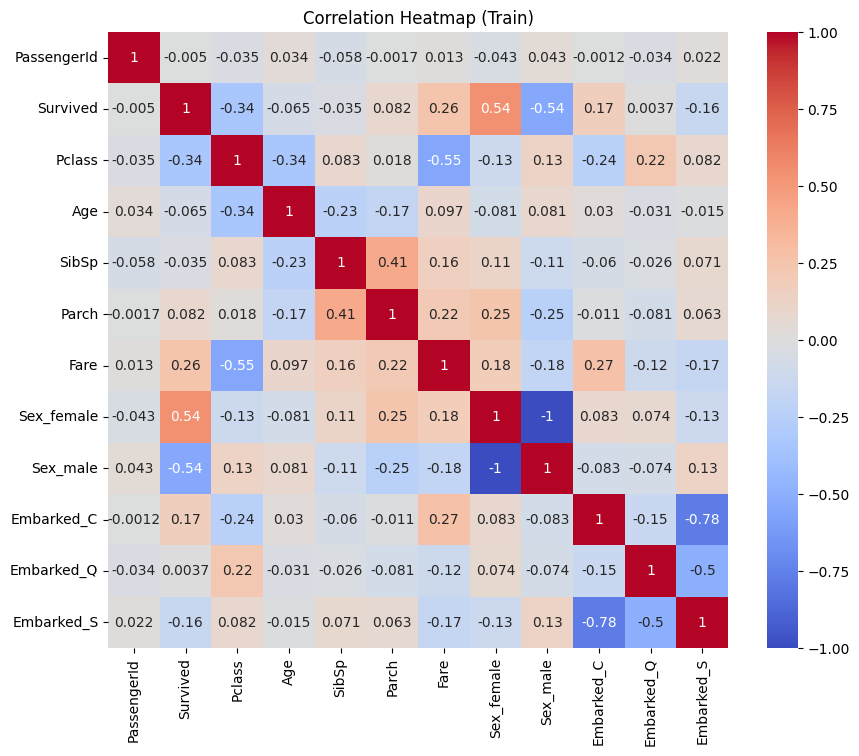

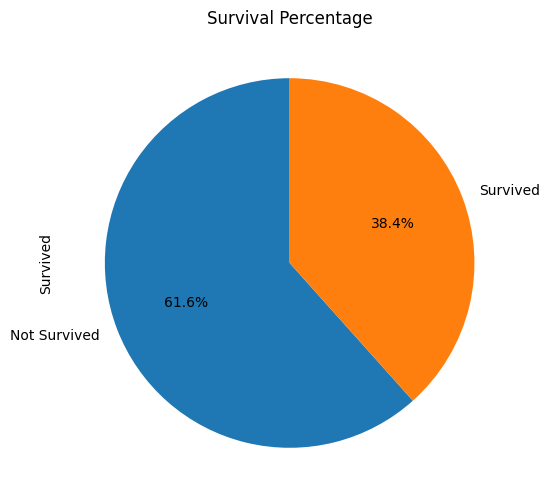

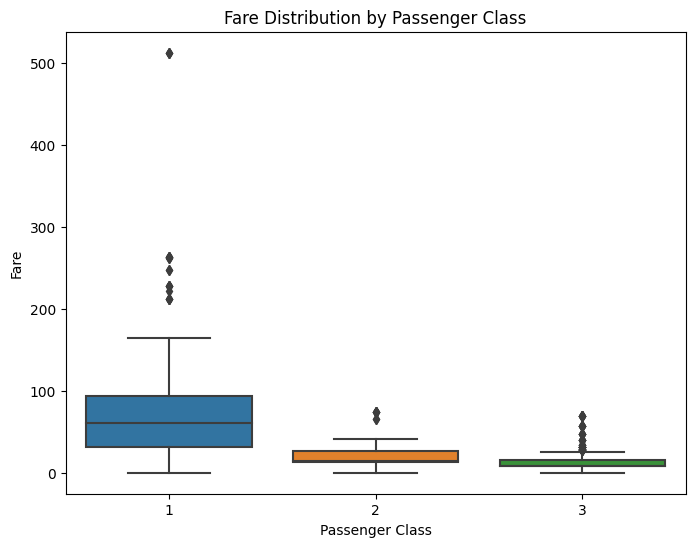

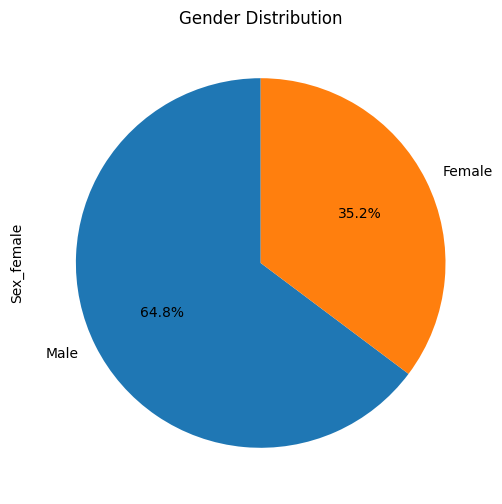

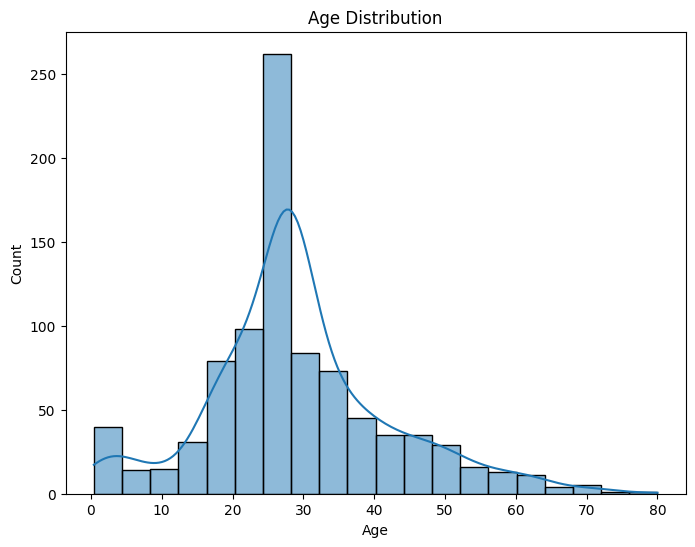

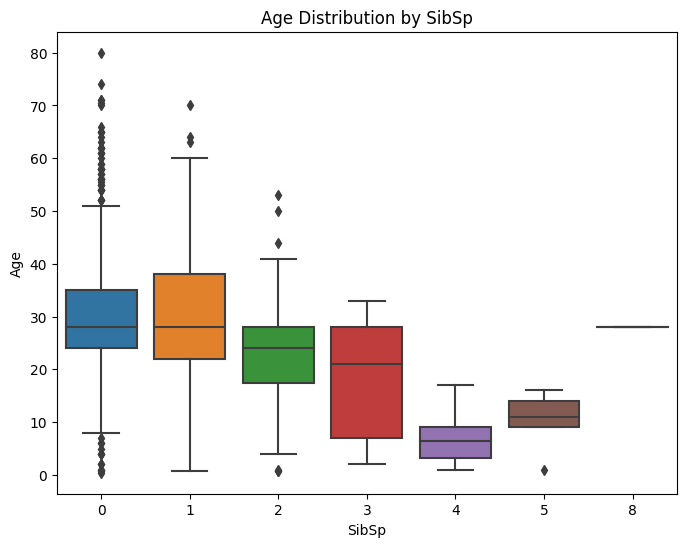

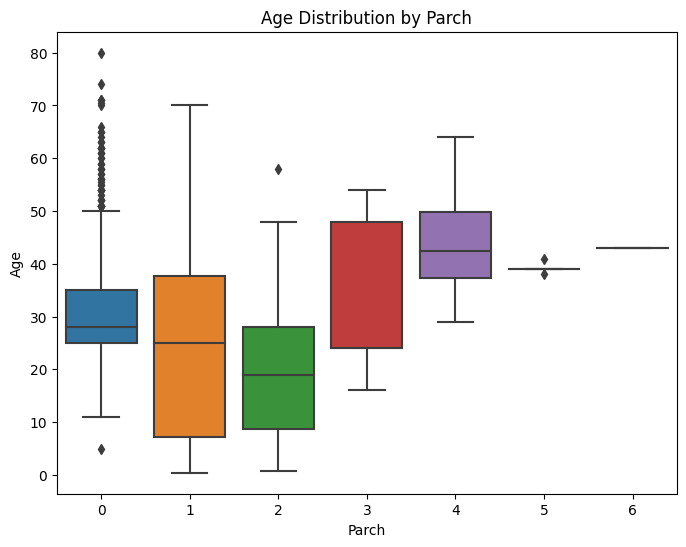

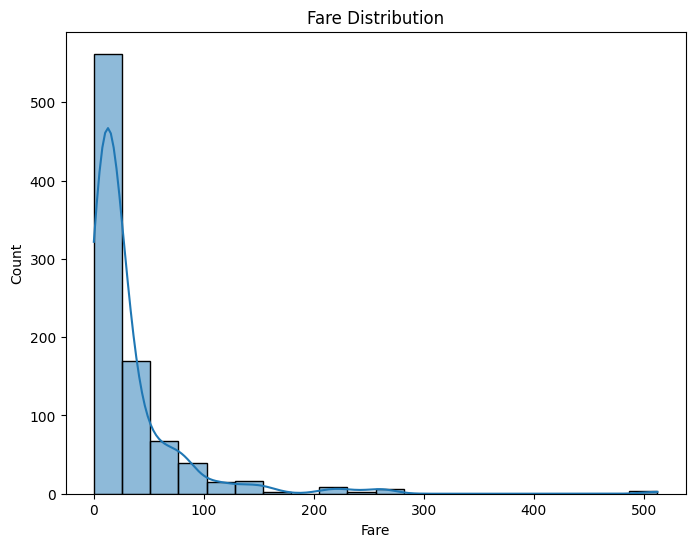

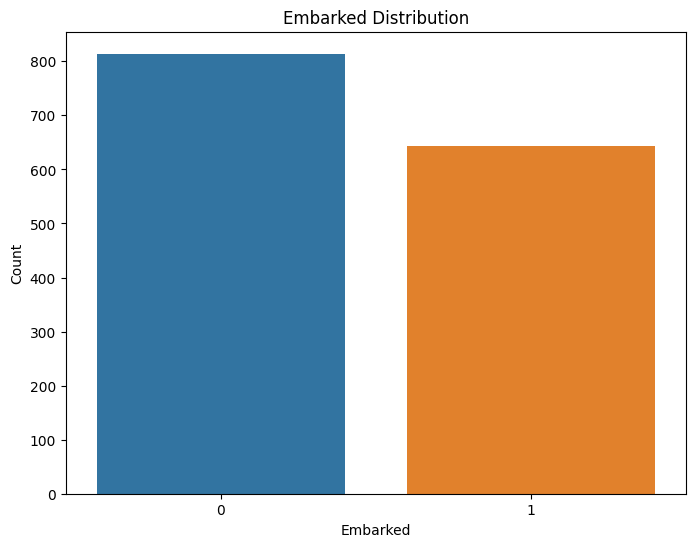

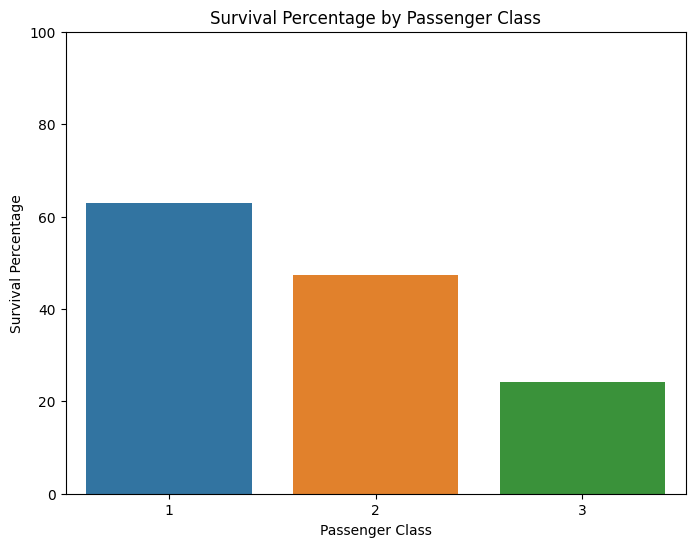

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])
print(train_data.describe())

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Train)')
plt.show()

# Graph 1: Survival Pie Chart
plt.figure(figsize=(6, 6))
train_data['Survived'].value_counts().plot(kind='pie', labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Percentage')
plt.show()

# Graph 2: Passenger Class Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=train_data)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

# Graph 3: Gender Distribution as a Pie Chart
plt.figure(figsize=(6, 6))
train_data['Sex_female'].value_counts().plot(kind='pie', labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

# Graph 4: Age Distribution as a Histogram
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Graph 5: Sibling/Spouse (SibSp) Distribution as a Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='SibSp', y='Age', data=train_data)
plt.title('Age Distribution by SibSp')
plt.xlabel('SibSp')
plt.ylabel('Age')
plt.show()

# Graph 6: Parent/Children (Parch) Distribution as a Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Parch', y='Age', data=train_data)
plt.title('Age Distribution by Parch')
plt.xlabel('Parch')
plt.ylabel('Age')
plt.show()

# Graph 7: Fare Distribution as a Histogram
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Fare'], bins=20, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Graph 8: Embarked Distribution as a Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked_S', data=train_data)
sns.countplot(x='Embarked_C', data=train_data)
sns.countplot(x='Embarked_Q', data=train_data)
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

survival_by_class = train_data.groupby('Pclass')['Survived'].mean() * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title('Survival Percentage by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Percentage')
plt.ylim(0, 100)
plt.show()
print(survival_by_class)
